In [1]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from nltk.tokenize import word_tokenize
import warnings
from sklearn.metrics import precision_recall_fscore_support
warnings.filterwarnings('ignore')

In [2]:
news=pd.read_csv(r"C:\Users\HP\Desktop\Datasets\fake_or_real_news.csv")


In [3]:
print(news)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [36]:
#checking for null values
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
# Counting the number of REAL and FAKE values
Counter(news['label'])

Counter({'FAKE': 3164, 'REAL': 3171})

# Splitting data


### Splitting the data into training and testing data.

In [5]:
x_train,x_test,y_train,y_test=train_test_split(news['text'],news['label'],test_size=0.2)


### TfidfVectorizer

In [6]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.8)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)
print(x_test.shape)
print(x_train.shape)

(1267, 60673)
(5068, 60673)


Text(0.5, 1.0, 'Fake news')

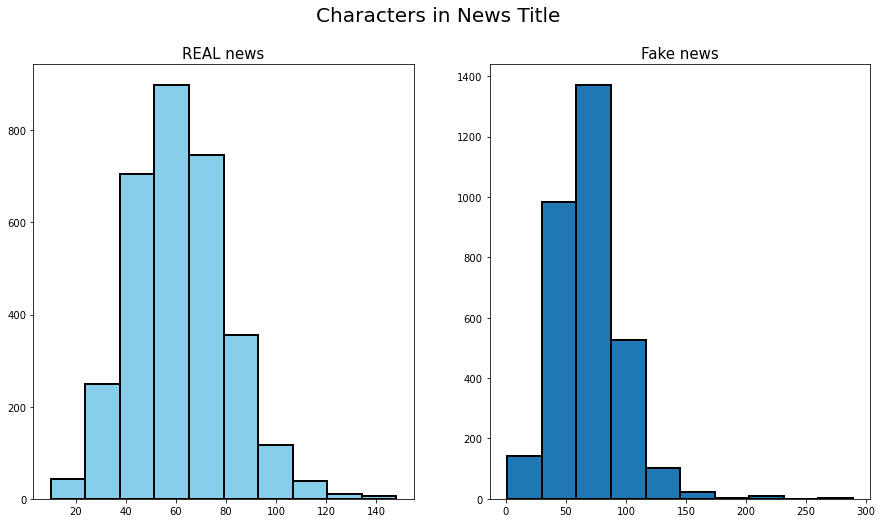

In [33]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news[news['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='skyblue',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

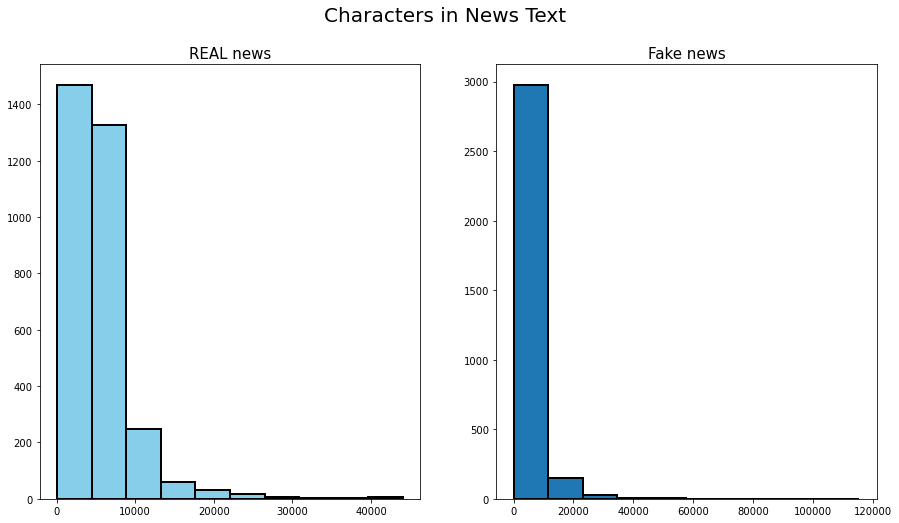

In [34]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
news_len=news[news['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='skyblue',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

# Fitting the model  and Finding the Accuracy

### PASSIVE AGGRESSIVE CLASSIFIER

In [39]:
model1=PassiveAggressiveClassifier(max_iter=300)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred1)
print(acc1)
precision_recall_fscore_support(y_test, y_pred1, average='macro')

0.936069455406472


(0.936066913905172, 0.9360473520249222, 0.9360565495197715, None)

### NAIVE BAYES CLASSIFIER

In [41]:
model2=GaussianNB()
model2.fit(x_train.toarray(),y_train)
y_pred2=model2.predict(x_test.toarray())
acc2=accuracy_score(y_test,y_pred2)
print(acc2)
precision_recall_fscore_support(y_test, y_pred2, average='macro')


0.8050513022888713


(0.8112028409494165, 0.805980062305296, 0.8043840123814472, None)

### DECISION TREE CLASSIFIER

In [42]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred3)
print(acc3)
precision_recall_fscore_support(y_test, y_pred3, average='macro')

0.8129439621152328


(0.8129093029514668, 0.8129420560747663, 0.8129211204584408, None)

### RANDOM FOREST CLASSIFIER

In [43]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
print(acc4)
precision_recall_fscore_support(y_test, y_pred4, average='macro')

0.89344909234412


(0.8935166034557516, 0.8935676012461059, 0.8934480303350271, None)

### SUPPORT VECTOR MACHINE

In [44]:
model5=SVC()
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred5)
print(acc5)
precision_recall_fscore_support(y_test, y_pred5, average='macro')

0.930544593528019


(0.931115327956855, 0.9303202492211837, 0.9304853109880793, None)

### LOGISTIC REGRESSION

In [45]:
model6=LogisticRegression()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred6)
print(acc6)
precision_recall_fscore_support(y_test, y_pred6, average='macro')

0.9139700078926598


(0.9143713561217155, 0.9137744548286604, 0.9139080113681346, None)

# COMPARING ACCURACY OF ML MODELS

<BarContainer object of 6 artists>

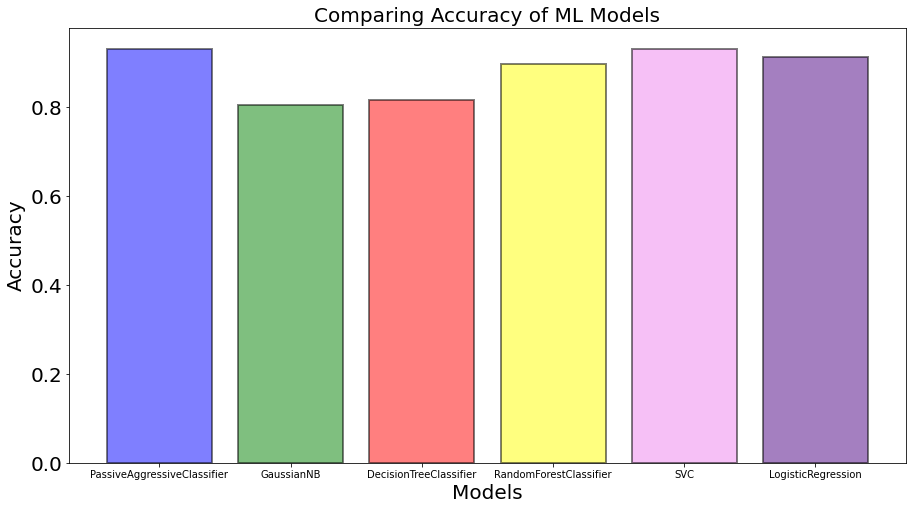

In [35]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['blue','green','red','yellow','violet','indigo']
labels={'PassiveAggressiveClassifier':acc1,'GaussianNB':acc2,'DecisionTreeClassifier':acc3,'RandomForestClassifier':acc4,
        'SVC':acc5,'LogisticRegression':acc6}
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

### Calculating confusion matrix to gain insight into the number of false and true negatives and positives.

In [20]:
cm1=confusion_matrix(y_test,y_pred1)
cm2=confusion_matrix(y_test,y_pred2)
cm3=confusion_matrix(y_test,y_pred3)
cm4=confusion_matrix(y_test,y_pred4)
cm5=confusion_matrix(y_test,y_pred5)
cm6=confusion_matrix(y_test,y_pred6)

In [21]:
print('Confusion Matrix for PassiveAggressiveClassifier')
cm1

Confusion Matrix for PassiveAggressiveClassifier


array([[597,  45],
       [ 41, 584]], dtype=int64)

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

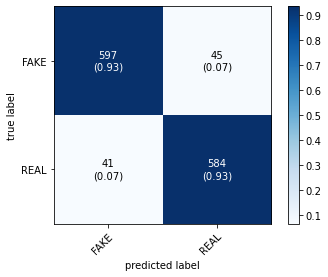

In [22]:
print('Confusion Matrix for PassiveAggressiveClassifier')
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [23]:
print('Confusion Matrix for GaussianNB')
cm2

Confusion Matrix for GaussianNB


array([[473, 169],
       [ 78, 547]], dtype=int64)

Confusion Matrix for GaussianNB


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

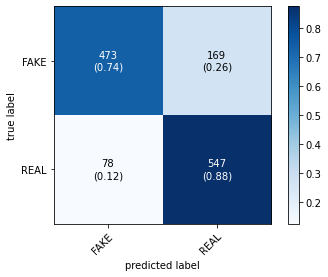

In [24]:
print('Confusion Matrix for GaussianNB')
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [25]:
print('Confusion Matrix for DecisionTreeClassifier')
cm3

Confusion Matrix for DecisionTreeClassifier


array([[529, 113],
       [119, 506]], dtype=int64)

Confusion Matrix for DecisionTreeClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

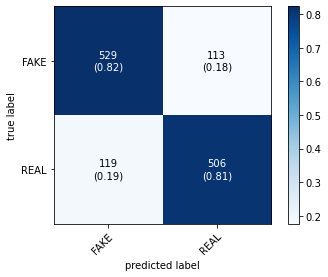

In [26]:
print('Confusion Matrix for DecisionTreeClassifier')
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [27]:
print('Confusion Matrix for RandomForestClassifier')
cm4

Confusion Matrix for RandomForestClassifier


array([[572,  70],
       [ 61, 564]], dtype=int64)

Confusion Matrix for RandomForestClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

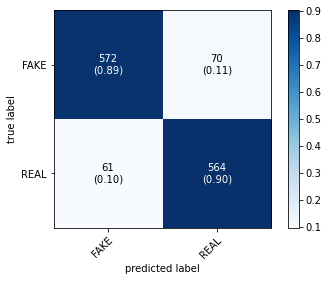

In [28]:
print('Confusion Matrix for RandomForestClassifier')
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [29]:
print('Confusion Matrix for SVC')
cm5

Confusion Matrix for SVC


array([[608,  34],
       [ 54, 571]], dtype=int64)

Confusion Matrix for SVC


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

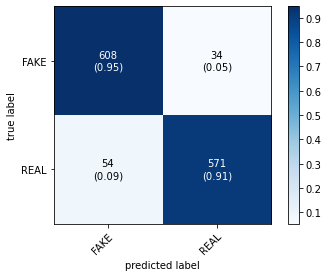

In [30]:
print('Confusion Matrix for SVC')
plot_confusion_matrix(conf_mat=cm5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [31]:
print('Confusion Matrix for LogisticRegression')
cm6

Confusion Matrix for LogisticRegression


array([[596,  46],
       [ 63, 562]], dtype=int64)

Confusion Matrix for LogisticRegression


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

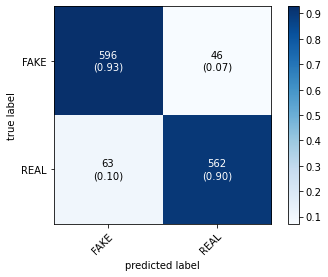

In [32]:
print('Confusion Matrix for LogisticRegression')
plot_confusion_matrix(conf_mat=cm6,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])